In [1]:
# Libraries

import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from dateutil.parser import parse

In [2]:
# Reading the dataset
covid19 = pd.read_csv("actas-defuncion-covid-19-cdmx1.csv",parse_dates=['FECHA'], index_col = "FECHA")
covid19.head()

,EDAD,SEMANA,MES,RAZON,ACTA
FECHA,,,,,
2020-03-18,41 AÑOS,12,3,"CHOQUE SEPTICO, NEUMONIA POR COVID 19 POR SARS...",7129
2020-03-23,61 AÑOS,13,3,"INSUFICIENCIA RESPIRATORIA AGUDA, NEUMONIA VIR...",4459
2020-03-26,60 AÑOS,13,3,"SINDROME DE INSUFICIENCIA RESPIRATORIA AGUDA, ...",4591
2020-03-26,37 AÑOS,13,3,NEUMONIA POR CORONAVIRUS,7879
2020-03-26,63 AÑOS,13,3,"CERVICOVAGINITIS PURULENTA, CARCINOMA EPIDERMO...",7829


In [3]:
number_by_date = covid19.drop(['EDAD', 'SEMANA', 'MES', 'RAZON', 'ACTA'], axis=1)
number_by_date_by_date

""
FECHA
2020-03-18
2020-03-23
2020-03-26
2020-03-26
2020-03-26
...
2020-05-12
2020-05-12
2020-05-12


In [4]:
number_by_date['MUERTES'] = 0

In [5]:
number_by_date

,MUERTES
FECHA,
2020-03-18,0
2020-03-23,0
2020-03-26,0
2020-03-26,0
2020-03-26,0
...,...
2020-05-12,0
2020-05-12,0
2020-05-12,0


In [6]:
number_by_date.reset_index()

,FECHA,MUERTES
0,2020-03-18,0
1,2020-03-23,0
2,2020-03-26,0
3,2020-03-26,0
4,2020-03-26,0
...,...,...
4574,2020-05-12,0
4575,2020-05-12,0
4576,2020-05-12,0
4577,2020-05-12,0


In [13]:
number_by_date = number_by_date.groupby('FECHA').count()
number_by_date.head()

,MUERTES
FECHA,
2020-03-18,1
2020-03-23,1
2020-03-26,3
2020-03-27,2
2020-03-28,1


In [26]:
temp = number_by_date.reset_index

In [27]:
x = temp['FECHA']
y = temp['MUERTES']

TypeError: 'method' object is not subscriptable

NameError: name 'x' is not defined

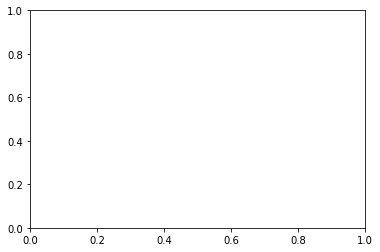

In [24]:
fig, ax = plt.subplots()
ax.plot(x, y, ".", label = "Data")
#ax.plot(x, y_logisticmodel, '.', label = "Logistic Model")
ax.set(xlabel = "FECHA", ylabel = "MUERTES")
ax.legend()
plt.show()

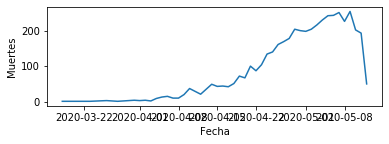

In [30]:
plt.subplot(211)
plt.plot(number_by_date)
plt.xlabel("Fecha")
plt.ylabel("Muertes")
plt.show()